# Model Selection 

The objective of this notebook is to build a very first ent to end Machine Learning model to predict the probability of a patient being discharged on a particular day.

We'll use the dataset generated by the `dataset` job of the ETL folder. 

At this instance, the focus won't be on model performance but rather on understanding the value potential of the available data and the speedness of the solution.

In [1]:
%cd /Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital

/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital


In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from matplotlib import pyplot as plt   
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from thesis_lib.utils import * 
from thesis_lib.modelling.data import *
from thesis_lib.modelling.model import *


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
data = Data().load('data/hospital_dataset')
variables = data.get_variables_dict()
data.get_stats()

Loading dataset:  hospital_train_data.parquet
Loading dataset:  hospital_val_data.parquet
Loading dataset:  hospital_test_data.parquet


dataset_type,train,val,test
n_observations,319150,33482,33309
relative_size,0.82694,0.0867542,0.0863059
n_cols,71,71,71
positives,42697,4555,4507
negatives,276453,28927,28802
positive_prop,0.133783,0.136043,0.135309
negative_prop,0.866217,0.863957,0.864691
min_date,2017-01-01,2018-11-11,2018-11-11
max_date,2018-11-10,2019-11-11,2019-11-11


In [4]:
sequence_features = ['labos_studies_names','sectors_names','images_study_types','surgeries_types',
                    'surgeries_injury_condition','surgeries_post_surgery_condition','surgeries_anesthesia_types']

In [5]:
text_features = ['administrative_diagnosis','presumptive_dianogsis','images_studies_names',
                'surgeries_actual']

In [6]:
categorical_features = ['date_weekday',
 'request_origin',
 'origin',
 'entity_group',
 'gender',
 'request_sector',
 'insurance_entity',
 'admission_sector',
 'emergency_service',
 'isolation',
 'ARM_TEP',
 'CEC_TEP',
 'request_sector',
 'date_weekday',
 'admission_weekday',
 'date_month',
 'admission_month']

In [8]:
numerical_features = ['PIM2TEP',
 'emergency_service',
 'high_risk_TEP',
 'hosp_day_number',
 'images_count',
 'images_cumulative',
 'images_emergencies',
 'images_requester_roles_count',
 'images_requesters_count',
 'images_study_types_count',
 'labos_count',
 'labos_cumulative',
 'labos_emergencies',
 'labos_requester_roles_count',
 'labos_requesters_count',
 'labos_set_count',
 'labos_set_cumulative',
 'low_risk_TEP',
 'new_born_gestation_age',
 'new_born_weight',
 'patient_age',
 'sectors_count',
 'sectors_last_stay',
 'surgeries_count',
 'surgeries_cumulative',
 'surgeries_post_surgery_duration',
 'surgeries_pre_surgery_duration',
 'surgeries_prep_duration',
 'surgeries_services_count',
 'surgeries_surgery_delay',
 'surgeries_surgery_duration',
 'surgeries_types_count']

### All features

In [9]:
model_params = {'classifier': 'lgbm',
               'accepts_sparse': True,
                'categorical_features' : categorical_features ,
                'numerical_features' : numerical_features,
               'text_features': text_features,
                'sequence_features':sequence_features
               }

In [10]:
lgbm_comb_features = Model(**model_params)
lgbm_comb_features.transform(data)


Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Encoding Categorical Features with OneHotEncoding
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
Transforming data...
	 Transforming numerical features
	 Preprocessing data
	 Transforming categorical features
	 Preprocessing data
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transf

In [11]:
lgbm_comb_features.n_features

21199

In [12]:
%%time
lgbm_comb_features.fit_classifier()

Training classifier


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training_set's auc: 0.859998	validation_set's auc: 0.854675
[20]	training_set's auc: 0.867428	validation_set's auc: 0.860628
[30]	training_set's auc: 0.87148	validation_set's auc: 0.863714
[40]	training_set's auc: 0.874992	validation_set's auc: 0.866052
[50]	training_set's auc: 0.8778	validation_set's auc: 0.867683
[60]	training_set's auc: 0.879756	validation_set's auc: 0.8687
[70]	training_set's auc: 0.881335	validation_set's auc: 0.869382
[80]	training_set's auc: 0.882934	validation_set's auc: 0.869929
[90]	training_set's auc: 0.884199	validation_set's auc: 0.870421
[100]	training_set's auc: 0.885328	validation_set's auc: 0.870824
CPU times: user 1min 12s, sys: 827 ms, total: 1min 13s
Wall time: 21.4 s


In [14]:
len(lgbm_comb_features.model_features)

21199

In [16]:
lgbm_comb_features.get_performance_metrics()

training AUC ROC score:  0.8853316864336858
validation AUC ROC score:  0.8708240019911586
relative over-fitting:  0.016386722247531144


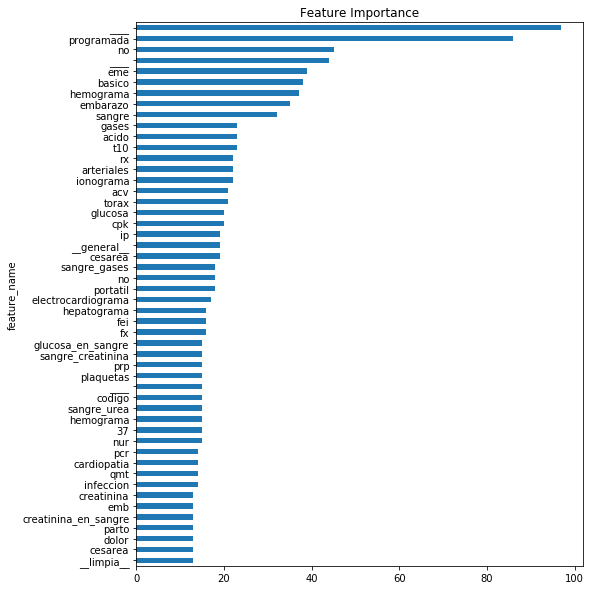

In [25]:
lgbm_comb_text_features.plot_feature_importance(50)

In [17]:
lgbm_param_grid = {'max_depth': [3,7,10],
                  'learning_rate': [0.1,0.01,0.001],
                  'num_iterations': [100,150,200,250]}

In [18]:
lgbm_comb_features.optimize_hyperparams(params_dict=lgbm_param_grid,
                                         n_folds=3,
                                         search_type='grid')

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   15.7s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   34.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  2.9min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  5.8min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  8.8min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed: 12.5min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 14.7min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed: 18.0min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed: 26.6min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed: 33.7min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 42.2min
[Parallel(n_jobs=2)]: Done 108 out of 108 | elapsed: 49.0min finished


{'mean_fit_time': array([ 13.21427639,  17.31094631,  24.53345029,  32.73737661,
         29.03440237,  42.95052679,  52.53798095,  59.18845932,
         39.89304336,  43.38829549,  54.96867577,  72.7400589 ,
         15.89934063,  23.19839597,  31.63599277,  29.65309564,
         25.5002737 ,  36.94174139,  47.62450798, 104.93550968,
         58.39482745,  84.08352804, 110.99840267, 143.71551704,
         21.75785383,  34.67421738,  56.89290428,  73.487245  ,
         66.73363837,  95.42184273,  71.59542878,  69.24571904,
         32.49592002,  49.13072904,  66.60075744,  74.76265669]),
 'std_fit_time': array([ 0.4670839 ,  0.17606188,  1.58005321,  4.17326146,  3.54741453,
         0.88759846,  2.3769391 ,  1.31546052,  3.29853162,  0.48828768,
         0.87818141,  2.81362296,  0.43537245,  0.32133617,  1.25536834,
         0.95490613,  0.68112399,  0.84202635,  0.92017845, 14.81054033,
         1.83856371,  0.26853916,  1.60102352,  9.98822146,  0.79769912,
         4.45439588,  0.

In [19]:
exp_results = lgbm_comb_features.get_model_selection_results()

In [20]:
exp_results.to_csv('experiments/combined/lgb_comb_features_grid_search_results.csv')

In [21]:
best_params = lgbm_comb_features.model_selection.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 10, 'num_iterations': 200}

In [31]:
%%time
lgbm_comb_features.fit_best_classifier()

Training classifier


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training_set's auc: 0.863158	validation_set's auc: 0.856788
[20]	training_set's auc: 0.869142	validation_set's auc: 0.861722
[30]	training_set's auc: 0.873119	validation_set's auc: 0.864785
[40]	training_set's auc: 0.876614	validation_set's auc: 0.86738
[50]	training_set's auc: 0.879237	validation_set's auc: 0.868803
[60]	training_set's auc: 0.881486	validation_set's auc: 0.869888
[70]	training_set's auc: 0.883216	validation_set's auc: 0.870502
[80]	training_set's auc: 0.884729	validation_set's auc: 0.871217
[90]	training_set's auc: 0.886104	validation_set's auc: 0.871427
[100]	training_set's auc: 0.88734	validation_set's auc: 0.871923
[110]	training_set's auc: 0.888588	validation_set's auc: 0.872278
[120]	training_set's auc: 0.889611	validation_set's auc: 0.872592
[130]	training_set's auc: 0.890595	validation_set's auc: 0.872759
[140]	training_set's auc: 0.891817	validation_set's auc: 0.873054
[150]	training_set's auc: 0.892579	validation_set's auc: 0.873243
[160]	training_set's 

In [23]:
lgbm_comb_features.get_performance_metrics()

training AUC ROC score:  0.8962562472396711
validation AUC ROC score:  0.8737796308258758
relative over-fitting:  0.025078337231143145


In [24]:
lgbm_comb_features.n_features

21199

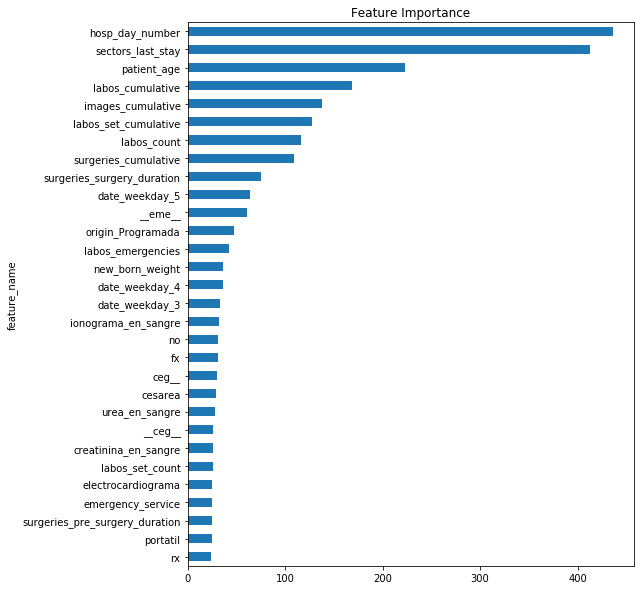

In [30]:
lgbm_comb_features.plot_feature_importance()

In [29]:
lgbm_comb_features.get_classifier_params()

{'objective': 'binary',
 'metric': 'auc',
 'is_unbalance': True,
 'max_depth': 10,
 'learning_rate': 0.1,
 'num_iterations': 200,
 'feature_names': ['PIM2TEP',
  'emergency_service',
  'high_risk_TEP',
  'hosp_day_number',
  'images_count',
  'images_cumulative',
  'images_emergencies',
  'images_requester_roles_count',
  'images_requesters_count',
  'images_study_types_count',
  'labos_count',
  'labos_cumulative',
  'labos_emergencies',
  'labos_requester_roles_count',
  'labos_requesters_count',
  'labos_set_count',
  'labos_set_cumulative',
  'low_risk_TEP',
  'new_born_gestation_age',
  'new_born_weight',
  'patient_age',
  'sectors_count',
  'sectors_last_stay',
  'surgeries_count',
  'surgeries_cumulative',
  'surgeries_post_surgery_duration',
  'surgeries_pre_surgery_duration',
  'surgeries_prep_duration',
  'surgeries_services_count',
  'surgeries_surgery_delay',
  'surgeries_surgery_duration',
  'surgeries_types_count',
  'date_weekday_0',
  'date_weekday_1',
  'date_weekday_

In [32]:
lgbm_comb_features.fit_classifier()

In [33]:
import pickle

In [36]:
outputfile ='experiments/combined/lgb_comb_features_optimized.pkl'
with open(outputfile, 'wb') as pickle_file:
    pickle.dump(lgbm_comb_features, pickle_file)

In [57]:
lgbm_comb_features.classifier.lgbm_classifier

In [40]:
import lightgbm

In [59]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(lgbm_comb_features.classifier, out_file='/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital/experiments/lgb_tree.dot', 
                feature_names = [name[:10] for name in lgbm_comb_features.model_features],
                class_names = ['False','True'],
                rounded = False, proportion = False, 
                precision = 2, filled = True,impurity=False,
               rotate=False)

NotFittedError: This LGBM_classifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [51]:
lightgbm.create_tree_digraph(lgbm_comb_features.classifier.lgbm_classifier, 1,
                precision = 2, filled = True,impurity=False,
               rotate=False)

TypeError: __init__() got an unexpected keyword argument 'filled'

In [53]:
from graphviz import Digraph

In [54]:
Digraph??

In [48]:
from lightgbm.plotting import *

In [49]:
to_graphviz(lgbm_comb_features.classifier.lgbm_classifier)

NameError: name 'to_graphviz' is not defined